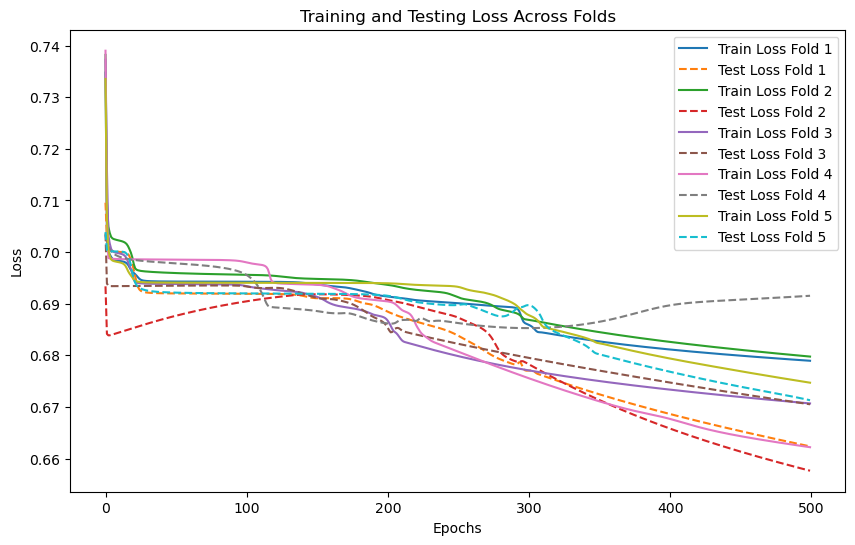

Average Training Loss: 0.6733
[0.6789458586325601, 0.6797565346199959, 0.6706798762491883, 0.662201362710308, 0.6746961845556567]
Average Testing Loss: 0.6707
[0.6623618576410641, 0.6576460698391431, 0.6705137627028107, 0.6915334967760857, 0.6712989412376049]


In [7]:
# Extra code outlining cross-validation, didn't feel this would be necessary within the report given the 

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn import metrics 

# Load data
data = pd.read_csv('heart-disease.csv')

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

final_train_losses = []
final_train_accuracies = []
final_test_losses = []
final_test_accuracies = []

all_train_losses = []
all_test_losses = []

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    input_nodes = x.shape[1]
    hidden_nodes = 5
    output_nodes = 1
    learning_rate = 0.01
    epochs = 500
    mini_batch = 128
    
    np.random.seed(42)
    w1 = np.random.uniform(-1, 1, (input_nodes, hidden_nodes))
    b1 = np.zeros((1, hidden_nodes))
    w2 = np.random.uniform(-1, 1, (hidden_nodes, output_nodes))
    b2 = np.zeros((1, output_nodes))
    
    def sigmoid(v):
        return 1 / (1 + np.exp(-v))
    
    def sigmoid_derivative(v):
        return sigmoid(v) * (1 - sigmoid(v))
    
    def crossEntrop(o, y):
        return (-y * np.log(o) - (1 - y) * np.log(1 - o))
    
    def crossEntrDeriv(o, y):
        return -(y / o - (1 - y) / (1 - o))
    
    train_E, test_E = [], []
    
    for epoch in range(epochs):
        #indices = np.arange(len(x_train))
        #np.random.shuffle(indices)
        #x_shuffled, y_shuffled = x_train[indices], y_train[indices]
        
        train_error_epoch = []
        
        for i in range(0, len(x_train), mini_batch):
            x_batch = x_train[i:i + mini_batch]
            y_batch = y_train[i:i + mini_batch]
            
            in1 = x_batch @ w1 + b1
            out1 = sigmoid(in1)
            in2 = out1 @ w2 + b2
            out2 = sigmoid(in2)
            
            error = crossEntrop(out2, y_batch).mean()
            train_error_epoch.append(error)
            
            dEdOut2 = crossEntrDeriv(out2, y_batch)
            dOut2dIn2 = sigmoid_derivative(in2)
            dIn2dW2 = out1
            
            dEdW2 = (1 / x_batch.shape[0]) * dIn2dW2.T @ (dEdOut2 * dOut2dIn2)
            dEdB2 = (1 / x_batch.shape[0]) * np.sum(dEdOut2 * dOut2dIn2, axis=0, keepdims=True)
            
            dIn2dOut1 = w2
            dOut1dIn1 = sigmoid_derivative(in1)
            dIn1dW1 = x_batch
            
            dEdW1 = (1 / x_batch.shape[0]) * dIn1dW1.T @ ((dEdOut2 * dOut2dIn2 @ dIn2dOut1.T) * dOut1dIn1)
            dEdB1 = (1 / x_batch.shape[0]) * np.sum((dEdOut2 * dOut2dIn2 @ dIn2dOut1.T) * dOut1dIn1, axis=0, keepdims=True)
            
            b2 -= learning_rate * dEdB2
            w2 -= learning_rate * dEdW2
            b1 -= learning_rate * dEdB1
            w1 -= learning_rate * dEdW1
        
        train_E.append(np.mean(train_error_epoch))
        
        in1_test = x_test @ w1 + b1
        out1_test = sigmoid(in1_test)
        in2_test = out1_test @ w2 + b2
        out2_test = sigmoid(in2_test)
        
        test_E.append(crossEntrop(out2_test, y_test).mean())
    
    final_train_losses.append(train_E[-1])
    final_test_losses.append(test_E[-1])
    all_train_losses.append(train_E)
    all_test_losses.append(test_E)

# Plot training and testing loss for each fold
plt.figure(figsize=(10, 6))
for i in range(len(all_train_losses)):
    plt.plot(range(epochs), all_train_losses[i], label=f'Train Loss Fold {i+1}')
    plt.plot(range(epochs), all_test_losses[i], label=f'Test Loss Fold {i+1}', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Across Folds')
plt.legend()
plt.show()

print(f"Average Training Loss: {np.mean(final_train_losses):.4f}")
print(final_train_losses)
print(f"Average Testing Loss: {np.mean(final_test_losses):.4f}")
print(final_test_losses)
